In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('Vital Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HR           40000 non-null  float64
 1   O2Sat        40000 non-null  float64
 2   Temp         40000 non-null  float64
 3   SBP          40000 non-null  float64
 4   MAP          40000 non-null  float64
 5   DBP          40000 non-null  float64
 6   Resp         40000 non-null  float64
 7   EtCO2        40000 non-null  float64
 8   Age          40000 non-null  float64
 9   Gender       40000 non-null  int64  
 10  SepsisLabel  40000 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 3.4 MB


Basic Rules form sirs detection of sepsis any 2 conditions together are true
1. Temp > 38 or < 36
2. HR > 90
3. Resp >20
4. PaCO2 > 32mg
5. WBC >12000mm3 or <4000mm3 or 4*10-9liter >10%imature bands

In [49]:
temp = data.Temp
hr =  data.HR
resp =  data.Resp
co2 = data.EtCO2 
y = data.SepsisLabel
tbl=data.loc[:,['Temp','HR','Resp','PaCO2','SepsisLabel']]
tbl

,Temp,HR,Resp,EtCO2,SepsisLabel
0,36.700000,92.000000,18.000000,33.145794,1
1,37.256453,90.487349,20.646328,33.145794,1
2,37.256453,64.000000,19.000000,33.145794,1
3,37.256453,107.000000,24.000000,33.145794,1
4,37.256453,90.487349,20.646328,33.145794,1
...,...,...,...,...,...
39995,37.440000,75.000000,14.000000,33.400497,0
39996,36.998803,97.000000,23.000000,33.400497,0
39997,36.000000,71.000000,18.000000,33.400497,0
39998,36.998803,84.754463,18.715891,33.400497,0


In [146]:
true = 0
false = 0
output=[]
for i in range(0,len(y)):
    tally = 0    
    if(temp[i]>38 or temp[i]<36):
        tally +=1
    if(hr[i]>90):
        tally+=1
    if(resp[i]>20):
        tally+=1
    if(co2[i]>32):
        tally+=1
    if(tally>=2 and y[i]==1) or (tally<2 and y[i]==0):
        true+=1
        output.append(1)
    else:
        false+=1
        output.append(0)
print("True count",true)
print("False count",false)
tbl['output']=output
tbl

True count 24864
False count 15136


,Temp,HR,Resp,EtCO2,O2Sat,SepsisLabel,output
0,36.700000,92.000000,18.000000,33.145794,98.000000,1,1
1,37.256453,90.487349,20.646328,33.145794,97.073223,1,1
2,37.256453,64.000000,19.000000,33.145794,100.000000,1,0
3,37.256453,107.000000,24.000000,33.145794,96.000000,1,1
4,37.256453,90.487349,20.646328,33.145794,97.073223,1,1
...,...,...,...,...,...,...,...
39995,37.440000,75.000000,14.000000,33.400497,100.000000,0,1
39996,36.998803,97.000000,23.000000,33.400497,98.000000,0,0
39997,36.000000,71.000000,18.000000,33.400497,96.000000,0,1
39998,36.998803,84.754463,18.715891,33.400497,97.231870,0,1


In [77]:
temp = data.Temp
hr =  data.HR
resp =  data.Resp
co2 = data.EtCO2
o2sat = data.O2Sat
y = data.SepsisLabel
tbl=data.loc[:,['Temp','HR','Resp','EtCO2','O2Sat','SepsisLabel']]
tbl

,Temp,HR,Resp,EtCO2,O2Sat,SepsisLabel
0,36.700000,92.000000,18.000000,33.145794,98.000000,1
1,37.256453,90.487349,20.646328,33.145794,97.073223,1
2,37.256453,64.000000,19.000000,33.145794,100.000000,1
3,37.256453,107.000000,24.000000,33.145794,96.000000,1
4,37.256453,90.487349,20.646328,33.145794,97.073223,1
...,...,...,...,...,...,...
39995,37.440000,75.000000,14.000000,33.400497,100.000000,0
39996,36.998803,97.000000,23.000000,33.400497,98.000000,0
39997,36.000000,71.000000,18.000000,33.400497,96.000000,0
39998,36.998803,84.754463,18.715891,33.400497,97.231870,0


In [81]:
true = 0
false = 0
output=[]
for i in range(0,len(y)):
    tally = 0    
    if(temp[i]>38 or temp[i]<36):
        tally +=1
    if(hr[i]>90):
        tally+=1
    if(resp[i]>20):
        tally+=1
    if(co2[i]<32):
        tally+=1
    if(o2sat[i]<95):
        tally+=1
    if(tally>=3 and y[i]==1) or (tally<3 and y[i]==0):
        true+=1
        output.append(1)
    else:
        false+=1
        #print(o2sat[i])
        output.append(0)
print("True count",true)
print("False count",false)
tbl['output']=output
tbl

True count 21222
False count 18778


,Temp,HR,Resp,EtCO2,O2Sat,SepsisLabel,output
0,36.700000,92.000000,18.000000,33.145794,98.000000,1,0
1,37.256453,90.487349,20.646328,33.145794,97.073223,1,0
2,37.256453,64.000000,19.000000,33.145794,100.000000,1,0
3,37.256453,107.000000,24.000000,33.145794,96.000000,1,0
4,37.256453,90.487349,20.646328,33.145794,97.073223,1,0
...,...,...,...,...,...,...,...
39995,37.440000,75.000000,14.000000,33.400497,100.000000,0,1
39996,36.998803,97.000000,23.000000,33.400497,98.000000,0,1
39997,36.000000,71.000000,18.000000,33.400497,96.000000,0,1
39998,36.998803,84.754463,18.715891,33.400497,97.231870,0,1


quick sofa
1. Resp > 22
2. SBP<= 100

In [55]:
sbp = data.SBP
tbl=data.loc[:,['Resp','SBP','SepsisLabel']]
tbl

,Resp,SBP,SepsisLabel
0,18.000000,117.000000,1
1,20.646328,120.644779,1
2,19.000000,122.000000,1
3,24.000000,170.000000,1
4,20.646328,120.644779,1
...,...,...,...
39995,14.000000,122.427444,0
39996,23.000000,153.000000,0
39997,18.000000,122.000000,0
39998,18.715891,122.427444,0


In [56]:
output=[]
for i in range(0,len(y)):
    tally = 0    
    if(resp[i]>22 and sbp[i]<=100):
        output.append(1)
    else:
        output.append(0)
tbl['output']=output

True count 1019
False count 38981


,Resp,SBP,SepsisLabel,output
0,18.000000,117.000000,1,0
1,20.646328,120.644779,1,0
2,19.000000,122.000000,1,0
3,24.000000,170.000000,1,0
4,20.646328,120.644779,1,0
...,...,...,...,...
39995,14.000000,122.427444,0,0
39996,23.000000,153.000000,0,0
39997,18.000000,122.000000,0,0
39998,18.715891,122.427444,0,0


sofa - exact values un-known hence finding form the dataset
1. PaO2/FiO2
2. Platelets
3. Bilirubin
4. cardiovascular Hypotension
5. CNSG coma score
6. Renal Creatinine

In [5]:
import pandas as pd
#extracting the required columns
data=pd.read_csv('DatasetBalanced.csv')

tbl2=data.loc[:,['SaO2','FiO2','Platelets','Bilirubin_total','MAP','Creatinine','SepsisLabel']]
#tbl2=tbl2[tbl2.FiO2 > 0]

FiO2 = tbl2.FiO2
SaO2 = tbl2.SaO2
Platelets =  tbl2.Platelets
Bilirubin_total =  tbl2.Bilirubin_total
MAP = tbl2.MAP
Creatinine = tbl2.Creatinine
y = tbl2.SepsisLabel

tbl2 = tbl2.assign(output=0)


In [13]:
for j in range(0,len(y)):
    tally = 0   
    if(j!=3651):
        #For criteria 1
        c1 = SaO2[j]/FiO2[j]
        c1=100
        if(c1>300):
            tally +=0
        elif(c1>=221):
            tally +=1
        elif(c1>=142):
            tally +=2
        elif(c1>=67):
            tally +=3
        else:
            tally +=4

        #For criteria 2
        c2=Platelets[j]
        if(c2>=150):
            tally +=0
        elif(c2>=100):
            tally +=1
        elif(c2>=50):
            tally +=2
        elif(c2>=20):
            tally +=3
        else:
            tally +=4

        #For criteria 3
        c3=Bilirubin_total[j]
        if(c3<1.2):
            tally +=0
        elif(c3<=1.9):
            tally +=1
        elif(c3<=5.9):
            tally +=2
        elif(c3<=11.9):
            tally +=3
        else:
            tally +=4

        #For criteria 4
        c4=MAP[j]
        if(c4>70):
            tally +=0
        else:
            tally +=1

        #For criteria 6
        c6=Creatinine[j]
        if(c6<1.2):
            tally +=0
        elif(c6<=1.9):
            tally +=1
        elif(c6<=3.4):
            tally +=2
        elif(c6<=4.9):
            tally +=3
        else:
            tally +=4
        
        if(tally>=5):
            tbl2.output[j]=1
        else:
            tbl2.output[j]=0
#tbl2['output']=output
tbl2

C:\Users\pavan\AppData\Local\Temp\ipykernel_27496\1731584977.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbl2.output[j]=1
C:\Users\pavan\AppData\Local\Temp\ipykernel_27496\1731584977.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbl2.output[j]=0
C:\Users\pavan\AppData\Local\Temp\ipykernel_27496\1731584977.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  c1 = SaO2[j]/FiO2[j]


,SaO2,FiO2,Platelets,Bilirubin_total,MAP,Creatinine,SepsisLabel,output
0,91.820606,0.559317,197.613414,2.379451,80.578177,1.459667,0,1
1,91.820606,0.400000,197.613414,2.379451,72.000000,1.459667,0,1
2,91.820606,0.559317,197.613414,2.379451,42.500000,1.459667,0,1
3,91.820606,0.559317,197.613414,2.379451,80.578177,1.459667,0,1
4,91.820606,0.400000,330.000000,2.379451,74.000000,0.800000,0,1
...,...,...,...,...,...,...,...,...
2055529,91.820606,0.500000,197.613414,2.379451,60.846975,1.459667,1,1
2055530,91.820606,0.559317,197.613414,2.379451,80.578177,1.459667,1,1
2055531,91.820606,0.559317,197.613414,2.379451,48.549547,1.459667,1,1
2055532,91.820606,0.530787,197.613414,2.379451,76.000000,1.459667,1,1


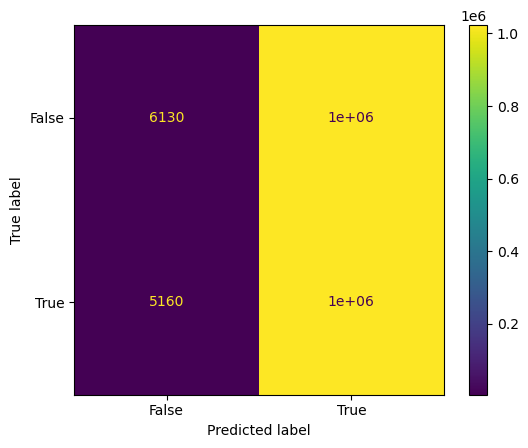

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(tbl2.SepsisLabel, tbl2.output)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [12]:
print(metrics.accuracy_score(tbl2.SepsisLabel, tbl2.output))

0.5010182268938388


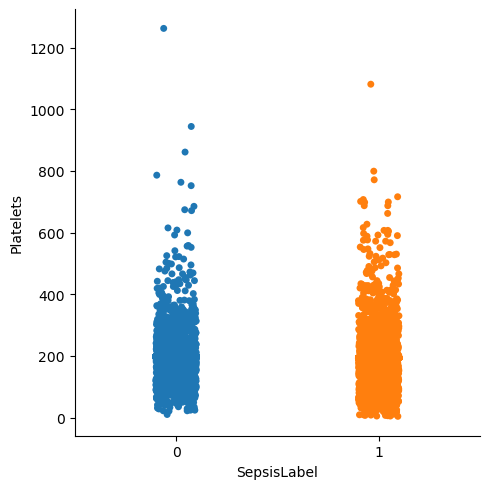

In [96]:
import seaborn as sns
df = pd.read_csv('CleanDataset.csv')
g1 = sns.catplot(x="SepsisLabel", y="Platelets", data=df)

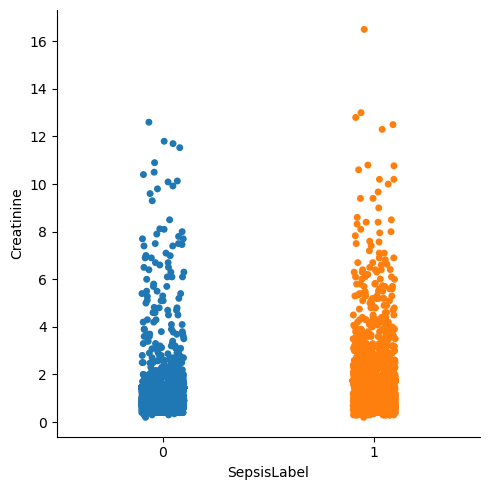

In [97]:
g2 = sns.catplot(x="SepsisLabel", y="Creatinine", data=df)

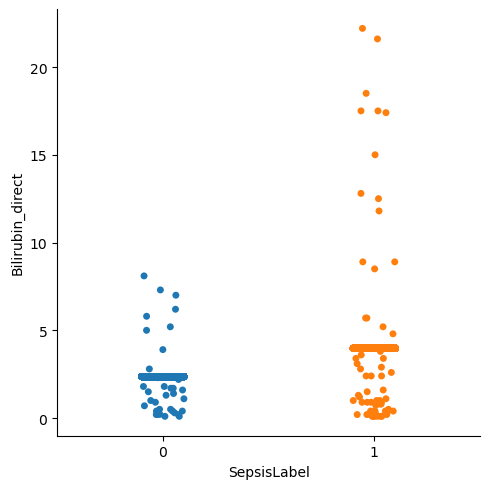

In [99]:
g2 = sns.catplot(x="SepsisLabel", y="Bilirubin_direct", data=df)

In [139]:
Bilirubin_direct=df.Bilirubin_direct
y=df.SepsisLabel
true = 0
false = 0
output=[]
for i in range(0,len(y)):
    tally = 0    
    if(Bilirubin_direct[i]>=3.6 and y[i]==1):
        true+=1
        output.append(1)
    else:
        false+=1
        output.append(0)

print("True count",true)
print("False count",false)
#Bilirubin_direct


True count 19956
False count 20044


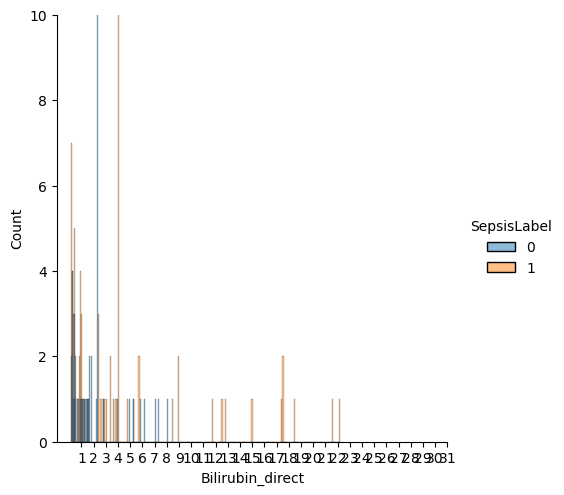

In [138]:
g3=sns.displot(df, x="Bilirubin_direct", hue="SepsisLabel").set(ylim=(0,20)).ax.set_xticks(range(1,32))



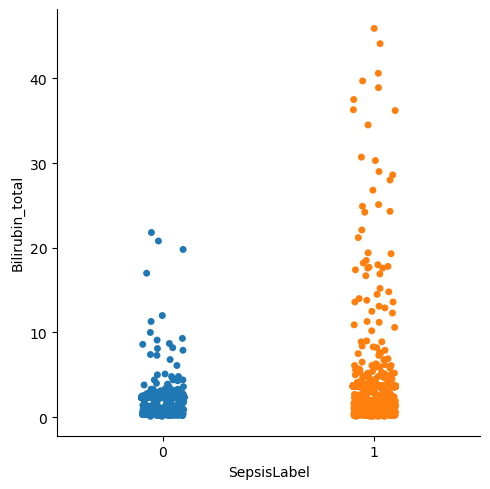

In [131]:
g2 = sns.catplot(x="SepsisLabel", y="Bilirubin_total", data=df)

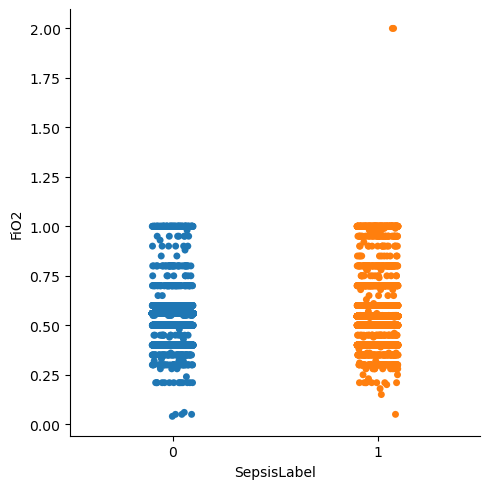

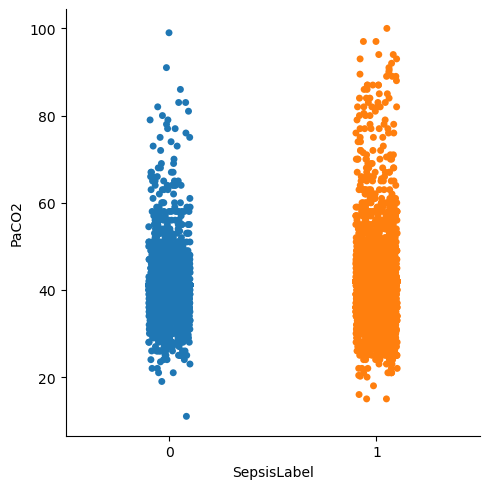

In [151]:
g2 = sns.catplot(x="SepsisLabel", y="FiO2", data=df)

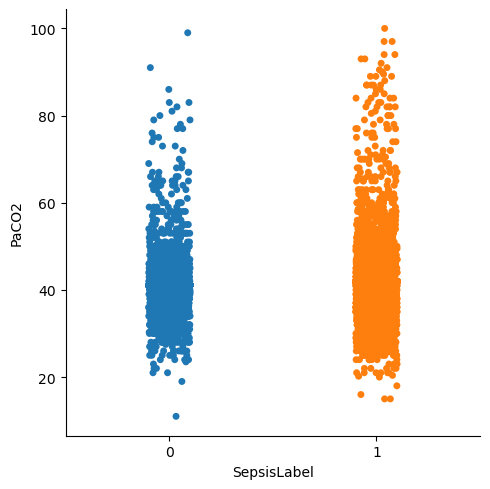

In [149]:
g2 = sns.catplot(x="SepsisLabel", y="PaCO2", data=df)

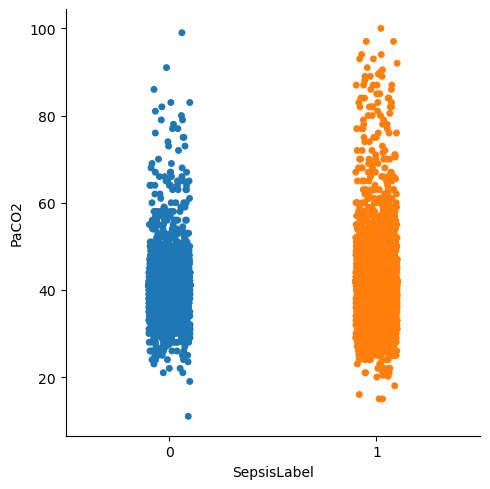

In [152]:
g5 = sns.catplot(x="SepsisLabel", y="PaCO2", data=df)

In [154]:
Map=df.MAP
y=df.SepsisLabel
true = 0
false = 0
output=[]
for i in range(0,len(y)):
    tally = 0    
    if(Map[i]>=74 and y[i]==1):
        true+=1
        output.append(1)
    else:
        false+=1
        output.append(0)

print("True count",true)
print("False count",false)
#Bilirubin_direct

True count 12585
False count 27415


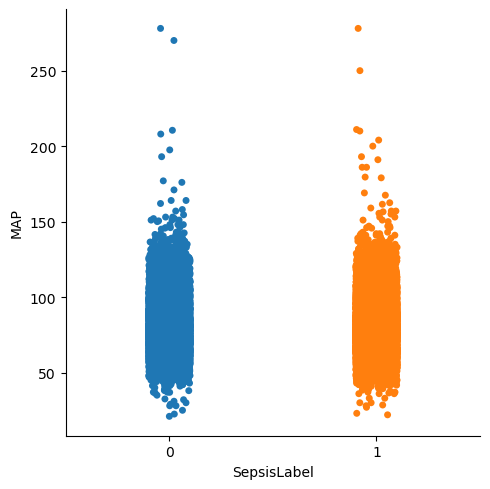

In [155]:
g5 = sns.catplot(x="SepsisLabel", y="MAP", data=df)

KeyboardInterrupt: 

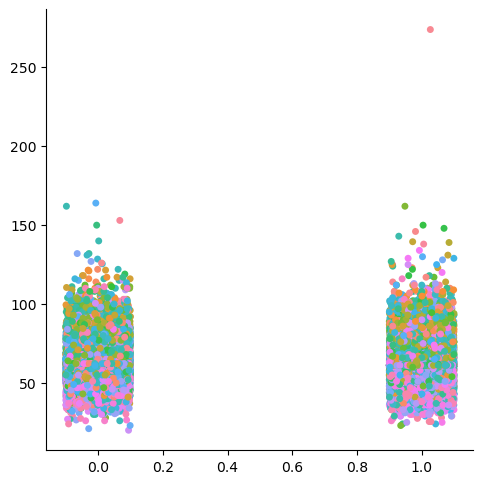

In [158]:
g5 = sns.scatterplot("DBP", hue='Gender', data=df)

In [18]:
import seaborn as sns
df = pd.read_csv('CleanDataset.csv')
g1 = sns.catplot(x="SepsisLabel", y="HCO3", data=df)

In [3]:
data = pd.read_csv('DatasetBalanced.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055534 entries, 0 to 2055533
Data columns (total 45 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0.1      int64  
 1   Unnamed: 0        int64  
 2   Hour              int64  
 3   HR                float64
 4   O2Sat             float64
 5   Temp              float64
 6   SBP               float64
 7   MAP               float64
 8   DBP               float64
 9   Resp              float64
 10  EtCO2             float64
 11  BaseExcess        float64
 12  HCO3              float64
 13  FiO2              float64
 14  pH                float64
 15  PaCO2             float64
 16  SaO2              float64
 17  AST               float64
 18  BUN               float64
 19  Alkalinephos      float64
 20  Calcium           float64
 21  Chloride          float64
 22  Creatinine        float64
 23  Bilirubin_direct  float64
 24  Glucose           float64
 25  Lactate           float64
 26  Magnesium     

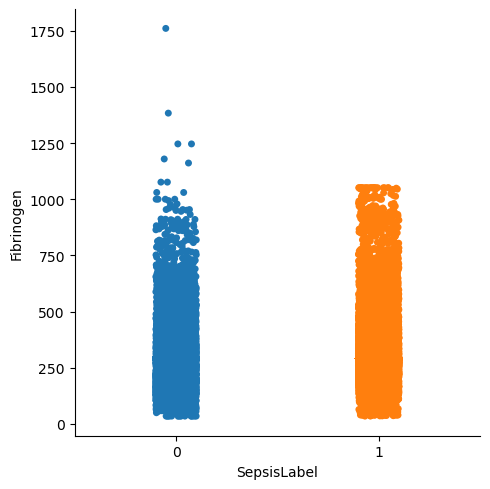

In [5]:
import seaborn as sns
g1 = sns.catplot(x="SepsisLabel", y="Fibrinogen", data=data)

In [21]:
g2 = sns.catplot(x="SepsisLabel", y="TroponinI", data=df)

In [ ]:
for i in range(0,len(y)):
    tally = 0    
    if(resp[i]>22 and sbp[i]<=100):
        output.append(1)
    else:
        output.append(0)

In [12]:
import seaborn as sns
df=pd.read_csv('SepsisSubdataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616661 entries, 0 to 616660
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        616661 non-null  int64  
 1   O2Sat             616661 non-null  float64
 2   SBP               616661 non-null  float64
 3   DBP               616661 non-null  float64
 4   EtCO2             616661 non-null  float64
 5   Temp              616661 non-null  float64
 6   HR                616661 non-null  float64
 7   Resp              616661 non-null  float64
 8   PaCO2             616661 non-null  float64
 9   SaO2              616661 non-null  float64
 10  FiO2              616661 non-null  float64
 11  Platelets         616661 non-null  float64
 12  Bilirubin_direct  616661 non-null  float64
 13  MAP               616661 non-null  float64
 14  Creatinine        616661 non-null  float64
 15  Age               616661 non-null  float64
 16  SepsisLabel       61

In [13]:
g2 = sns.catplot(x="SepsisLabel", y="Bilirubin_direct", data=df)

In [17]:
g2 = sns.catplot(x="SepsisLabel", y="Temp", data=df)

In [18]:
g3=sns.displot(df, x="Age", hue="SepsisLabel")